# CLASSIFICAÇÃO

In [121]:
import pandas as pd
import numpy as np

## base credit

In [122]:
# pip install plotly
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

In [123]:
base_credit = pd.read_csv("C:/Users/danil/OneDrive/Documentos/Machine Learning e Data Science com Python de A à Z-20240611T140920Z-001/Machine Learning e Data Science com Python de A à Z/Bases de dados/credit_data.csv")

In [124]:
base_credit.head()

clientid        income        age         loan  default
0         1  66155.925095  59.017015  8106.532131        0
1         2  34415.153966  48.117153  6564.745018        0
2         3  57317.170063  63.108049  8020.953296        0
3         4  42709.534201  45.751972  6103.642260        0
4         5  66952.688845  18.584336  8770.099235        1

In [125]:
base_credit.tail(8)

clientid        income        age         loan  default
1992      1993  30803.806165  23.250084   623.024153        0
1993      1994  54421.410155  26.821928  3273.631823        0
1994      1995  24254.700791  37.751622  2225.284643        0
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

In [126]:
base_credit.describe()

clientid        income          age          loan      default
count  2000.000000   2000.000000  1997.000000   2000.000000  2000.000000
mean   1000.500000  45331.600018    40.807559   4444.369695     0.141500
std     577.494589  14326.327119    13.624469   3045.410024     0.348624
min       1.000000  20014.489470   -52.423280      1.377630     0.000000
25%     500.750000  32796.459717    28.990415   1939.708847     0.000000
50%    1000.500000  45789.117313    41.317159   3974.719419     0.000000
75%    1500.250000  57791.281668    52.587040   6432.410625     0.000000
max    2000.000000  69995.685578    63.971796  13766.051239     1.000000

In [127]:
base_credit[base_credit['income'] >= 69995.685578]


clientid        income        age         loan  default
422       423  69995.685578  52.719673  2084.370861        0

In [128]:
# pegar os valores unicos de default e contar
np.unique(base_credit['default'], return_counts=True)


(array([0, 1], dtype=int64), array([1717,  283], dtype=int64))

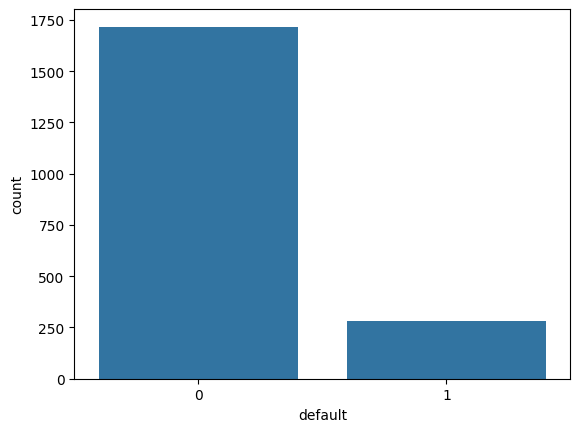

In [129]:
sns.countplot(x= base_credit['default']);


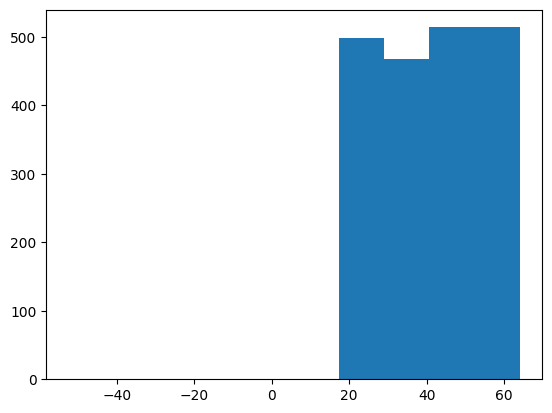

In [130]:
plt.hist(x= base_credit['age']);


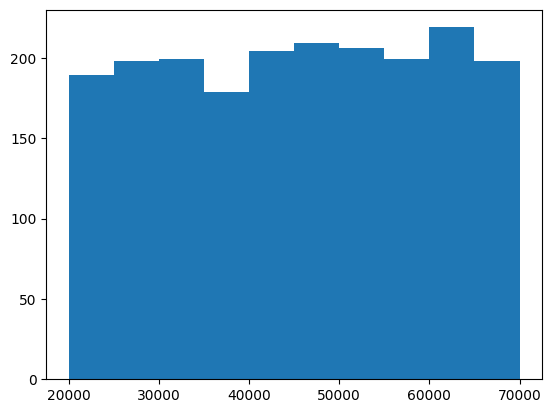

In [131]:
plt.hist(x = base_credit['income']);


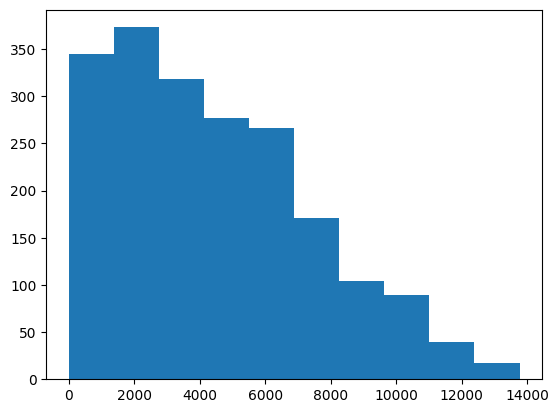

In [132]:
plt.hist(base_credit['loan']);


In [133]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color='default');
grafico


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'dimensions': [{'axis': {'matches': True},
                              'label': 'age',
                              'values': array([59.01701507, 48.1171531 , 63.10804949, ..., 28.0171669 , 63.97179584,
                                               56.15261703])},
                             {'axis': {'matches': True},
                              'label': 'income',
                              'values': array([66155.92509508, 34415.15396582, 57317.17006303, ..., 44311.44926231,
                                               43756.05660491, 69436.57955155])},
                             {'axis': {'matches': True},
                              'label': 'loan',
                              'values': array([8106.53213129, 6564.74501768, 8020.95329639, ..., 5522.78669326,
                                               1622.72259832, 7378.83359873])}],
              'hovertemplate': ('%{xaxis.title.text}=%{x}<br>%{' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'name': '',
              'showlegend': False,
              'type': 'splom'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'default'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'dragmode': 'select',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...'}
})

In [134]:
base_credit.loc[base_credit['age'] < 0]


clientid        income        age         loan  default
15        16  50501.726689 -28.218361  3977.287432        0
21        22  32197.620701 -52.423280  4244.057136        0
26        27  63287.038908 -36.496976  9595.286289        0

In [135]:
base_credit[base_credit['age'] < 0]


clientid        income        age         loan  default
15        16  50501.726689 -28.218361  3977.287432        0
21        22  32197.620701 -52.423280  4244.057136        0
26        27  63287.038908 -36.496976  9595.286289        0

In [136]:
base_credit2 = base_credit.drop('age', axis=1)
base_credit2



clientid        income         loan  default
0            1  66155.925095  8106.532131        0
1            2  34415.153966  6564.745018        0
2            3  57317.170063  8020.953296        0
3            4  42709.534201  6103.642260        0
4            5  66952.688845  8770.099235        1
...        ...           ...          ...      ...
1995      1996  59221.044874  1926.729397        0
1996      1997  69516.127573  3503.176156        0
1997      1998  44311.449262  5522.786693        1
1998      1999  43756.056605  1622.722598        0
1999      2000  69436.579552  7378.833599        0

[2000 rows x 4 columns]

In [137]:
base_credit3 = base_credit.drop(base_credit[base_credit['age'] < 0].index)
base_credit3

clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[1997 rows x 5 columns]

In [138]:
base_credit[base_credit['age'] < 0].index



Index([15, 21, 26], dtype='int64')

In [139]:
base_credit3.loc[base_credit3['age'] < 0]


Empty DataFrame
Columns: [clientid, income, age, loan, default]
Index: []

In [140]:
base_credit.mean()


clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

In [141]:
base_credit3['age'].mean()


40.92770044906149

In [142]:
base_credit['age'][base_credit['age']>0].mean()


40.92770044906149

In [143]:
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92


In [144]:
base_credit.head(27)


clientid        income        age         loan  default
0          1  66155.925095  59.017015  8106.532131        0
1          2  34415.153966  48.117153  6564.745018        0
2          3  57317.170063  63.108049  8020.953296        0
3          4  42709.534201  45.751972  6103.642260        0
4          5  66952.688845  18.584336  8770.099235        1
5          6  24904.064140  57.471607    15.498598        0
6          7  48430.359613  26.809132  5722.581981        0
7          8  24500.141984  32.897548  2971.003310        1
8          9  40654.892537  55.496853  4755.825280        0
9         10  25075.872771  39.776378  1409.230371        0
10        11  64131.415372  25.679575  4351.028971        0
11        12  59436.847123  60.471936  9254.244538        0
12        13  61050.346079  26.355044  5893.264659        0
13        14  27267.995458  61.576776  4759.787581        0
14        15  63061.960174  39.201553  1850.369377        0
15        16  50501.726689  40.920000  3977.287432        0
16        17  43548.654711  39.574530  3935.544453        0
17        18  43378.175194  60.848318  3277.737553        0
18        19  20542.365073  61.690571  3157.442290        0
19        20  58887.357549  26.076093  4965.516066        0
20        21  23000.784002  31.761354  1148.118057        0
21        22  32197.620701  40.920000  4244.057136        0
22        23  23329.319414  48.576975   222.622299        0
23        24  27845.800894  51.970624  4959.921226        0
24        25  65301.984029  48.840922  5465.267886        0
25        26  47451.630123  27.031741  5361.282716        0
26        27  63287.038908  40.920000  9595.286289        0

In [145]:
base_credit.isnull().sum()


clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [146]:
base_credit.loc[base_credit['age'].isnull()]


clientid        income  age         loan  default
28        29  59417.805406  NaN  2082.625938        0
30        31  48528.852796  NaN  6155.784670        0
31        32  23526.302555  NaN  2862.010139        0

In [147]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)



C:\Users\danil\AppData\Local\Temp\ipykernel_9488\708075239.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [148]:
base_credit.loc[base_credit['age'].isnull()]
    

Empty DataFrame
Columns: [clientid, income, age, loan, default]
Index: []

In [149]:
base_credit.loc[base_credit['clientid'].isin([29, 31, 32])]


clientid        income        age         loan  default
28        29  59417.805406  40.927689  2082.625938        0
30        31  48528.852796  40.927689  6155.784670        0
31        32  23526.302555  40.927689  2862.010139        0

In [150]:
# divisão entre previsores e classes
x_credit = base_credit.iloc[:, 1:4].values # pegando todas as linhas :, coluna de 1 a 3 e usando values para passar pro numpy


In [151]:
x_credit # dados estão em notação cientifica



array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [152]:
type(x_credit)



numpy.ndarray

In [153]:
type(base_credit)
    

pandas.core.frame.DataFrame

In [154]:
y_credit = base_credit.iloc[:, 4].values



In [155]:
y_credit

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [156]:
type(y_credit)


numpy.ndarray

In [157]:
x_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [158]:
x_credit[:,0].min(), x_credit[:,1].min()

(20014.4894700497, 18.055188510566897)

In [159]:
x_credit[:,0].max(), x_credit[:,1].max()

(69995.6855783239, 63.971795841120205)

In [160]:
# padronização (standardisation)
# x = (x-média(x))/(desvio padrão(x))
# geralmente utilizado com dados muito fora do padrão

In [161]:
# normalização (normalization)
# x = (x - mínimo(x)/(máximo(x) - mínimo(x)))

In [162]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)

In [163]:
x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:, 2].min()
# valores agora na mesma escala

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [164]:
x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:, 2].max()
# valores agora na mesma escala

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

In [165]:
x_credit
# valores agora na mesma escala

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

In [166]:
'''
UCI - machine learning repository

pegar mais base de dados para treinar depois
'''

'\nUCI - machine learning repository\n\npegar mais base de dados para treinar depois\n'

## base de dados census

In [167]:
base_census = pd.read_csv("C:/Users/danil/OneDrive/Documentos/Machine Learning e Data Science com Python de A à Z-20240611T140920Z-001/Machine Learning e Data Science com Python de A à Z/Bases de dados/census.csv")

In [168]:
base_census

age          workclass  final-weight    education  education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [169]:
base_census.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

In [170]:
base_census.isna().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [171]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

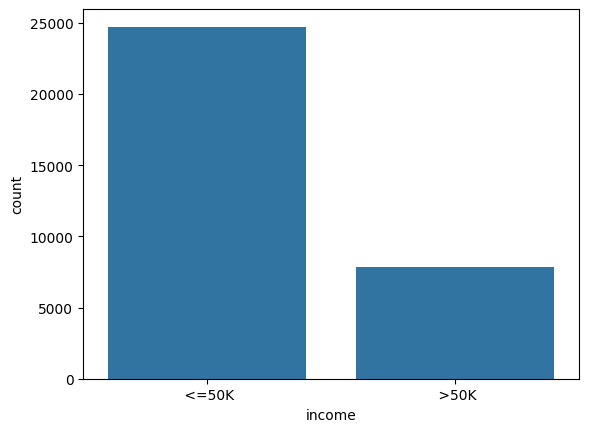

In [172]:
sns.countplot(x = base_census['income']);

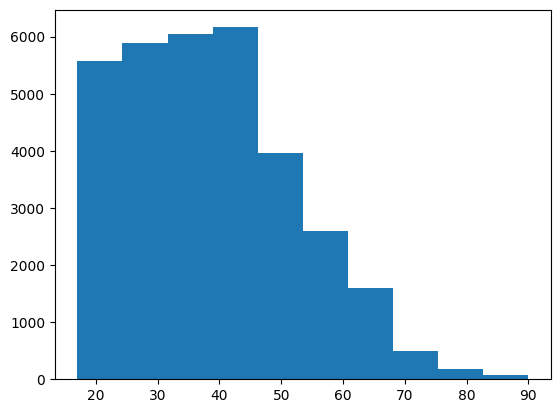

In [173]:
plt.hist(x = base_census['age']);

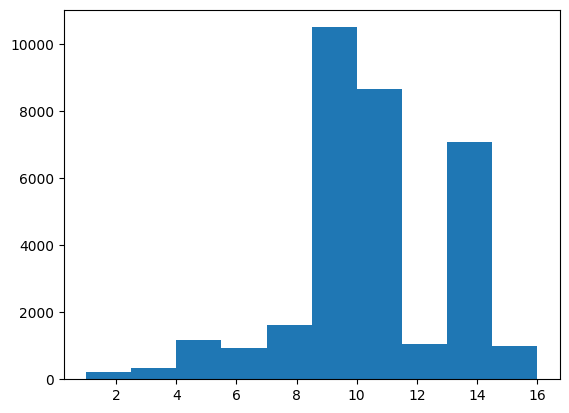

In [174]:
plt.hist(x = base_census['education-num']);

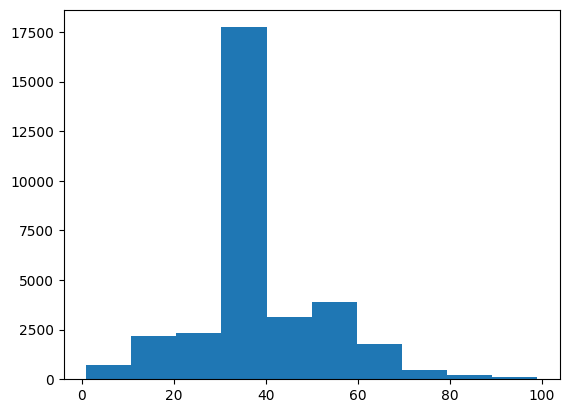

In [175]:
plt.hist(x = base_census['hour-per-week']);

In [176]:
grafico = px.treemap(base_census, path=['workclass', 'age'])
grafico.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [177]:
grafico = px.treemap(base_census, path=['occupation', 'relationship', 'age'])
grafico.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [178]:
grafico = px.parallel_categories(base_census, dimensions=['occupation', 'relationship'])
grafico.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [179]:
grafico = px.parallel_categories(base_census, dimensions=['workclass', 'occupation', 'income'])
grafico

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'dimensions': [{'label': 'workclass',
                              'values': array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
                                               ' Private', ' Self-emp-inc'], dtype=object)},
                             {'label': 'occupation',
                              'values': array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ...,
                                               ' Adm-clerical', ' Adm-clerical', ' Exec-managerial'], dtype=object)},
                             {'label': 'income',
                              'values': array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
                                              dtype=object)}],
              'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'name': '',
              'type': 'parcats'}],
    'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
})

In [180]:
grafico = px.parallel_categories(base_census, dimensions=['education', 'income'])
grafico

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'dimensions': [{'label': 'education',
                              'values': array([' Bachelors', ' Bachelors', ' HS-grad', ..., ' HS-grad', ' HS-grad',
                                               ' HS-grad'], dtype=object)},
                             {'label': 'income',
                              'values': array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
                                              dtype=object)}],
              'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'name': '',
              'type': 'parcats'}],
    'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
})

In [181]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [182]:
# novamente vamos dividir os previsores e classe
x_census = base_census.iloc[:, :14].values

In [183]:
x_census



array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [184]:
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [185]:
y_census = base_census.iloc[:, 14].values

In [186]:
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

## LabelEncoder

In [187]:
from sklearn.preprocessing import LabelEncoder

In [188]:
label_encoder_teste = LabelEncoder()

In [189]:
x_census[:,1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [190]:
teste = label_encoder_teste.fit_transform(x_census[:,1])

In [191]:
teste # substituido valores unicos por numeros

array([7, 6, 4, ..., 4, 4, 5])

In [192]:
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [193]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [194]:
# devemos colocar nos valores string
x_census[:, 1] = label_encoder_workclass.fit_transform(x_census[:,1])
x_census[:, 3] = label_encoder_education.fit_transform(x_census[:,1])
x_census[:, 5] = label_encoder_marital.fit_transform(x_census[:,1])
x_census[:, 6] = label_encoder_occupation.fit_transform(x_census[:,1])
x_census[:, 7] = label_encoder_relationship.fit_transform(x_census[:,1])
x_census[:, 8] = label_encoder_race.fit_transform(x_census[:,1])
x_census[:, 9] = label_encoder_sex.fit_transform(x_census[:,1])
x_census[:, 13] = label_encoder_country.fit_transform(x_census[:,1])

In [195]:
x_census[0] # todos em num agr

array([39, 7, 77516, 7, 13, 7, 7, 7, 7, 7, 2174, 0, 40, 7], dtype=object)

In [196]:
x_census

array([[39, 7, 77516, ..., 0, 40, 7],
       [50, 6, 83311, ..., 0, 13, 6],
       [38, 4, 215646, ..., 0, 40, 4],
       ...,
       [58, 4, 151910, ..., 0, 40, 4],
       [22, 4, 201490, ..., 0, 20, 4],
       [52, 5, 287927, ..., 0, 40, 5]], dtype=object)

## OneHotEncoder

In [197]:
'''
Carro               em uma coluna carro, cada componente recebe valores diferentes
gol  palho   uno    todos estão no mesmo preço, porém
1      2      3     o algoritimo vai colocar um peso maior no atributo mais alto(uno)
                    e por isso usamos o OneHotEncoder para ajustar esse erro


                    será adicionado novas colunas para consertar esse erro

gol     1 0 0
palho   0 1 0
uno     0 0 1

                    será adicionada um numero de colunas = qtd elementos da coluna
                    workclass possui 9 elementos

                    usando a base_census (workclass possui 9 elementos) exemplo
                    ficaria assim:
   
   State-gov,              private
1 0 0 0 0 0 0 0 0,    0 0 0 0 1 0 0 0 0


                    occupation possui 15 elementos

        Not-in-family                       Unmarried
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0,    0 0 0 0 0 0 0 0 0 0 1 0 0 0 0



                    dessa forma o problema de que um atributo fique
                    mais importante do que outro é resolvido
'''

'\nCarro               em uma coluna carro, cada componente recebe valores diferentes\ngol  palho   uno    todos estão no mesmo preço, porém\n1      2      3     o algoritimo vai colocar um peso maior no atributo mais alto(uno)\n                    e por isso usamos o OneHotEncoder para ajustar esse erro\n\n\n                    será adicionado novas colunas para consertar esse erro\n\ngol     1 0 0\npalho   0 1 0\nuno     0 0 1\n\n                    será adicionada um numero de colunas = qtd elementos da coluna\n                    workclass possui 9 elementos\n\n                    usando a base_census (workclass possui 9 elementos) exemplo\n                    ficaria assim:\n   \n   State-gov,              private\n1 0 0 0 0 0 0 0 0,    0 0 0 0 1 0 0 0 0\n\n\n                    occupation possui 15 elementos\n\n        Not-in-family                       Unmarried\n1 0 0 0 0 0 0 0 0 0 0 0 0 0 0,    0 0 0 0 0 0 0 0 0 0 1 0 0 0 0\n\n\n\n                    dessa forma o problema de

In [198]:
len(np.unique(base_census['workclass']))



9

In [199]:
len(np.unique(base_census['occupation']))



15

In [200]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer



In [201]:
# pegamos os atributos la em cima e fazemos os ajustes para varias colunas                 esse remainder serve para não apagar os atributos 
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')



In [202]:
x_census = onehotencoder_census.fit_transform(x_census).toarray()


In [203]:

x_census # podemos perceber que existe um numero maior de colunas



array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [204]:
x_census.shape # antes eram 15 colunas, e agora são 108

 

(32561, 78)

In [205]:
# ainda existe atributos numericos com grande valor que devem ser ajustados

# lembrando que utilizamos o metodo da padronização


# ----------------------------------------------------------
# PADRONIZAÇÃO (standardisation)
# x = (x-média(x))/(desvio padrão(x))
# geralmente utilizado com dados muito fora do padrão

# ----------------------------------------------------------

# NORMALIZAÇÃO (normalization)
# x = (x - mínimo(x)/(máximo(x) - mínimo(x)))

# ----------------------------------------------------------

In [206]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
x_census = scaler_census.fit_transform(x_census)

In [207]:
x_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.2444502 ,
       -0.17429511, -0.26209736, -0.01466381, -1.5167923 , -0.18838933,
       -0.29093568,  4.90769968, -0.02073999, -0.2444502 , -0.17429511,
       -0.26209736, -0.01466381, -1.5167923 , -0.18838933, -0.29093568,
        4.90769968, -0.02073999, -0.2444502 , -0.17429511, -0.26209736,
       -0.01466381, -1.5167923 , -0.18838933, -0.29093568,  4.90769968,
       -0.02073999, -0.2444502 , -0.17429511, -0.26209736, -0.01466381,
       -1.5167923 , -0.18838933, -0.29093568,  4.90769968, -0.02073999,
       -0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.2444502 ,
       -0.17429511, -0.26209736, -0.01466381, -1.5167923 , -0.18838933,
       -0.29093568,  4.90769968, -0.02073999, -0.2444502 , -0.17429511,
       -0.26209736, -0.01466381, -1.5167923 , -0.18838933, -0.29

## Divisão das bases em treinamento e teste

In [208]:
# aula 29 para mais detalhes
from sklearn.model_selection import train_test_split

### Credit data

In [209]:
# x significa os previsores e y indica a classe                                                                                                                  
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_credit, y_credit, test_size=0.25, random_state=0)

In [210]:
x_credit_treinamento.shape # 1500 registros para enviar para o sistema aprender

(1500, 3)

In [211]:
y_credit_treinamento.shape

(1500,)

In [212]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

### Census

In [213]:
x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste = train_test_split(x_census, y_census, test_size=0.15, random_state=0)

In [214]:
x_census_treinamento.shape

(27676, 78)

In [215]:
y_census_treinamento.shape

(27676,)

In [216]:
x_census_teste.shape, y_census_teste.shape

((4885, 78), (4885,))

In [217]:
import pickle

### Checkpoint

In [218]:
with open('credit.pkl', mode='wb') as f:
    pickle.dump([x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste], f)

In [219]:
with open('census.pkl', mode='wb') as f:
    pickle.dump([x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste], f)

## Naïve bayes

In [220]:
# aula 34 para entender melhor

In [221]:
from sklearn.naive_bayes import GaussianNB

In [222]:
base_risco_credito = pd.read_csv("C:/Users/danil/OneDrive/Documentos/Machine Learning e Data Science com Python de A à Z-20240611T140920Z-001/Machine Learning e Data Science com Python de A à Z/Bases de dados/risco_credito.csv")

In [223]:
base_risco_credito

historia divida garantias     renda     risco
0           ruim   alta   nenhuma      0_15      alto
1   desconhecida   alta   nenhuma     15_35      alto
2   desconhecida  baixa   nenhuma     15_35  moderado
3   desconhecida  baixa   nenhuma  acima_35      alto
4   desconhecida  baixa   nenhuma  acima_35     baixo
5   desconhecida  baixa  adequada  acima_35     baixo
6           ruim  baixa   nenhuma      0_15      alto
7           ruim  baixa  adequada  acima_35  moderado
8            boa  baixa   nenhuma  acima_35     baixo
9            boa   alta  adequada  acima_35     baixo
10           boa   alta   nenhuma      0_15      alto
11           boa   alta   nenhuma     15_35  moderado
12           boa   alta   nenhuma  acima_35     baixo
13          ruim   alta   nenhuma     15_35      alto

In [224]:
# x será os atributos previsores
# y será a classe

x_risco_credito = base_risco_credito.iloc[:,0:4].values
x_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [225]:
y_risco_credito = base_risco_credito.iloc[:,4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [226]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [227]:
x_risco_credito[:,0] = label_encoder_historia.fit_transform(x_risco_credito[:,0])
x_risco_credito[:,1] = label_encoder_divida.fit_transform(x_risco_credito[:,1])
x_risco_credito[:,2] = label_encoder_garantia.fit_transform(x_risco_credito[:,2])
x_risco_credito[:,3] = label_encoder_renda.fit_transform(x_risco_credito[:,3])

In [228]:
# essa base de dados é pequena... Não usaremos o OneHotEncoder nessa base em especifico

x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [229]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
    pickle.dump([x_risco_credito, y_risco_credito], f)

In [230]:
naive_risco_credito = GaussianNB()

# aqui é feito o treinamento do algoritimo!
# "fit" é responsável por criar a tabela de probabilidade
naive_risco_credito.fit(x_risco_credito, y_risco_credito) 

GaussianNB()

In [231]:
# historia boa(0), divida alta(0), garantia nenhuma(1), renda > 35(2)
# historia ruim(2), divida alta(0), garantia adequada(0), renda < 15(0)

previsao = naive_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])

In [232]:
previsao # ele retornou somente a classe sem o n° de probabilidade

array(['baixo', 'moderado'], dtype='<U8')

In [233]:
# contar quantos atributos de cada classe
naive_risco_credito.class_count_

array([6., 5., 3.])

In [234]:
# valor da priori
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

In [235]:
# infelizmente não é possivel ver a probabilidade

### Base credit data

In [236]:
import pickle

with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [237]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [238]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [239]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(x_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [240]:
previsoes = naive_credit_data.predict(x_credit_teste)

In [241]:
# previsões da base
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [242]:
# gabarito da base
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [243]:
# vamos agr comparar as respostas usando essa biblioteca
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [244]:
accuracy_score(y_credit_teste, previsoes) # 93,8% de acerto

0.938

In [245]:
confusion_matrix(y_credit_teste, previsoes)

'''
428 clientes que pagam e foram classificados como pagam, 8 clientes que pagam e foram classificados que não pagam
23 naõ pagam, mas foram classificados como que pagam e 41 que não pagam e foram classificados que não pagam
'''

'\n428 clientes que pagam e foram classificados como pagam, 8 clientes que pagam e foram classificados que não pagam\n23 naõ pagam, mas foram classificados como que pagam e 41 que não pagam e foram classificados que não pagam\n'

In [246]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



### Base census

In [247]:
import pickle

with open('census.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [248]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 78), (27676,))

In [249]:
x_census_teste.shape, y_census_teste.shape

((4885, 78), (4885,))

In [250]:
naive_census = GaussianNB()
naive_census.fit(x_census_treinamento, y_census_treinamento)
previsoes = naive_census.predict(x_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype='<U6')

In [251]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [252]:
accuracy_score(y_census_teste, previsoes) # taxa de acerto de 24%

0.2444216990788127

In [253]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       1.00      0.00      0.00      3693
        >50K       0.24      1.00      0.39      1192

    accuracy                           0.24      4885
   macro avg       0.62      0.50      0.20      4885
weighted avg       0.82      0.24      0.10      4885



## Árvore de decisão

In [254]:
from sklearn.tree import DecisionTreeClassifier

In [255]:
# entropy(s) = -Pi * log2Pi  (Pi não é o pi - 3,14)
# e(s) = -6/14 * log(6/14;2) - 3/14 * log(3/14;2) - 5/14 * log(5/14;2) = 1,53

# gain(s, a) = entropy(s) - |Sv|/|S|
# g(historia)
# g(divida)
# g(garantias)
# g(renda)

### Base risco de crédito

In [256]:
import pickle

with open('risco_credito.pkl', 'rb') as f:
    x_risco_credito, y_risco_credito = pickle.load(f)

In [257]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [258]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [259]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(x_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [260]:
arvore_risco_credito.feature_importances_

array([0.48015651, 0.06408636, 0.03885431, 0.41690281])

In [261]:
arvore_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

[Text(0.6, 0.9166666666666666, 'renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = alto'),
 Text(0.4, 0.75, 'história <= 1.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = alto'),
 Text(0.3, 0.5833333333333334, 'dívida <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = alto'),
 Text(0.2, 0.4166666666666667, 'renda <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]\nclass = alto'),
 Text(0.1, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = alto'),
 Text(0.3, 0.25, 'história <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1]\nclass = alto'),
 Text(0.2, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.4, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = alto'),
 Text(0.4, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.5, 0.5833333333333334, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = alto')

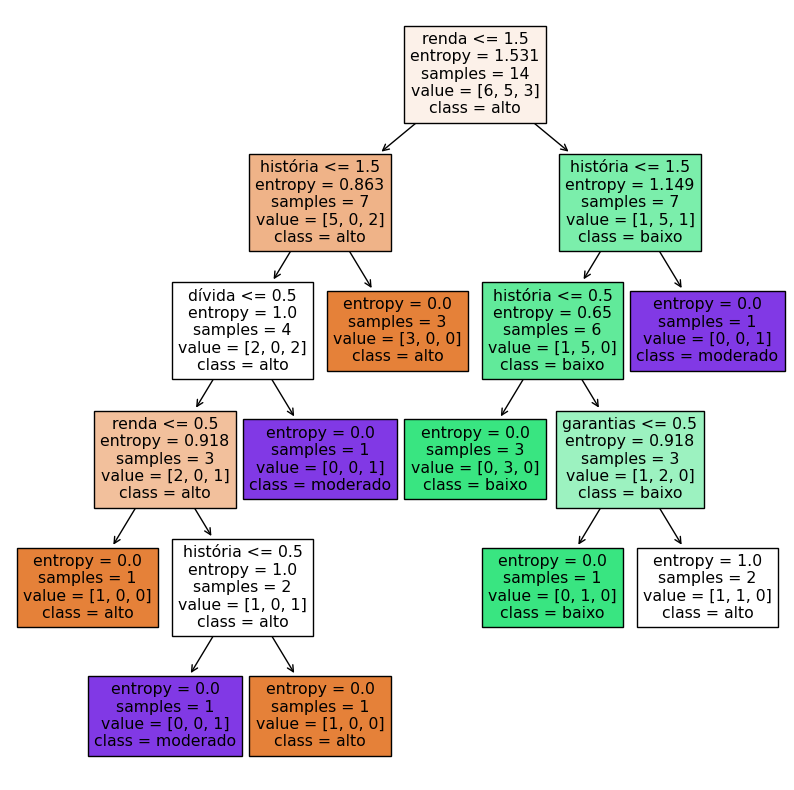

In [262]:
from sklearn import tree
previsores = ['história', 'dívida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names=arvore_risco_credito.classes_, filled=True)

In [263]:
# historia boa(0), divida alta(0), garantia nenhuma(1), renda > 35(2)
# historia ruim(2), divida alta(0), garantia adequada(0), renda < 15(0)
previsoes = arvore_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

### Base credit data

In [264]:
import pickle

with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [265]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [266]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [267]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit.fit(x_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [268]:
previsoes = arvore_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [269]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [270]:
from sklearn.metrics import accuracy_score, classification_report

In [271]:
accuracy_score(y_credit_teste, previsoes) # resultado melhor que naives

0.982

In [272]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



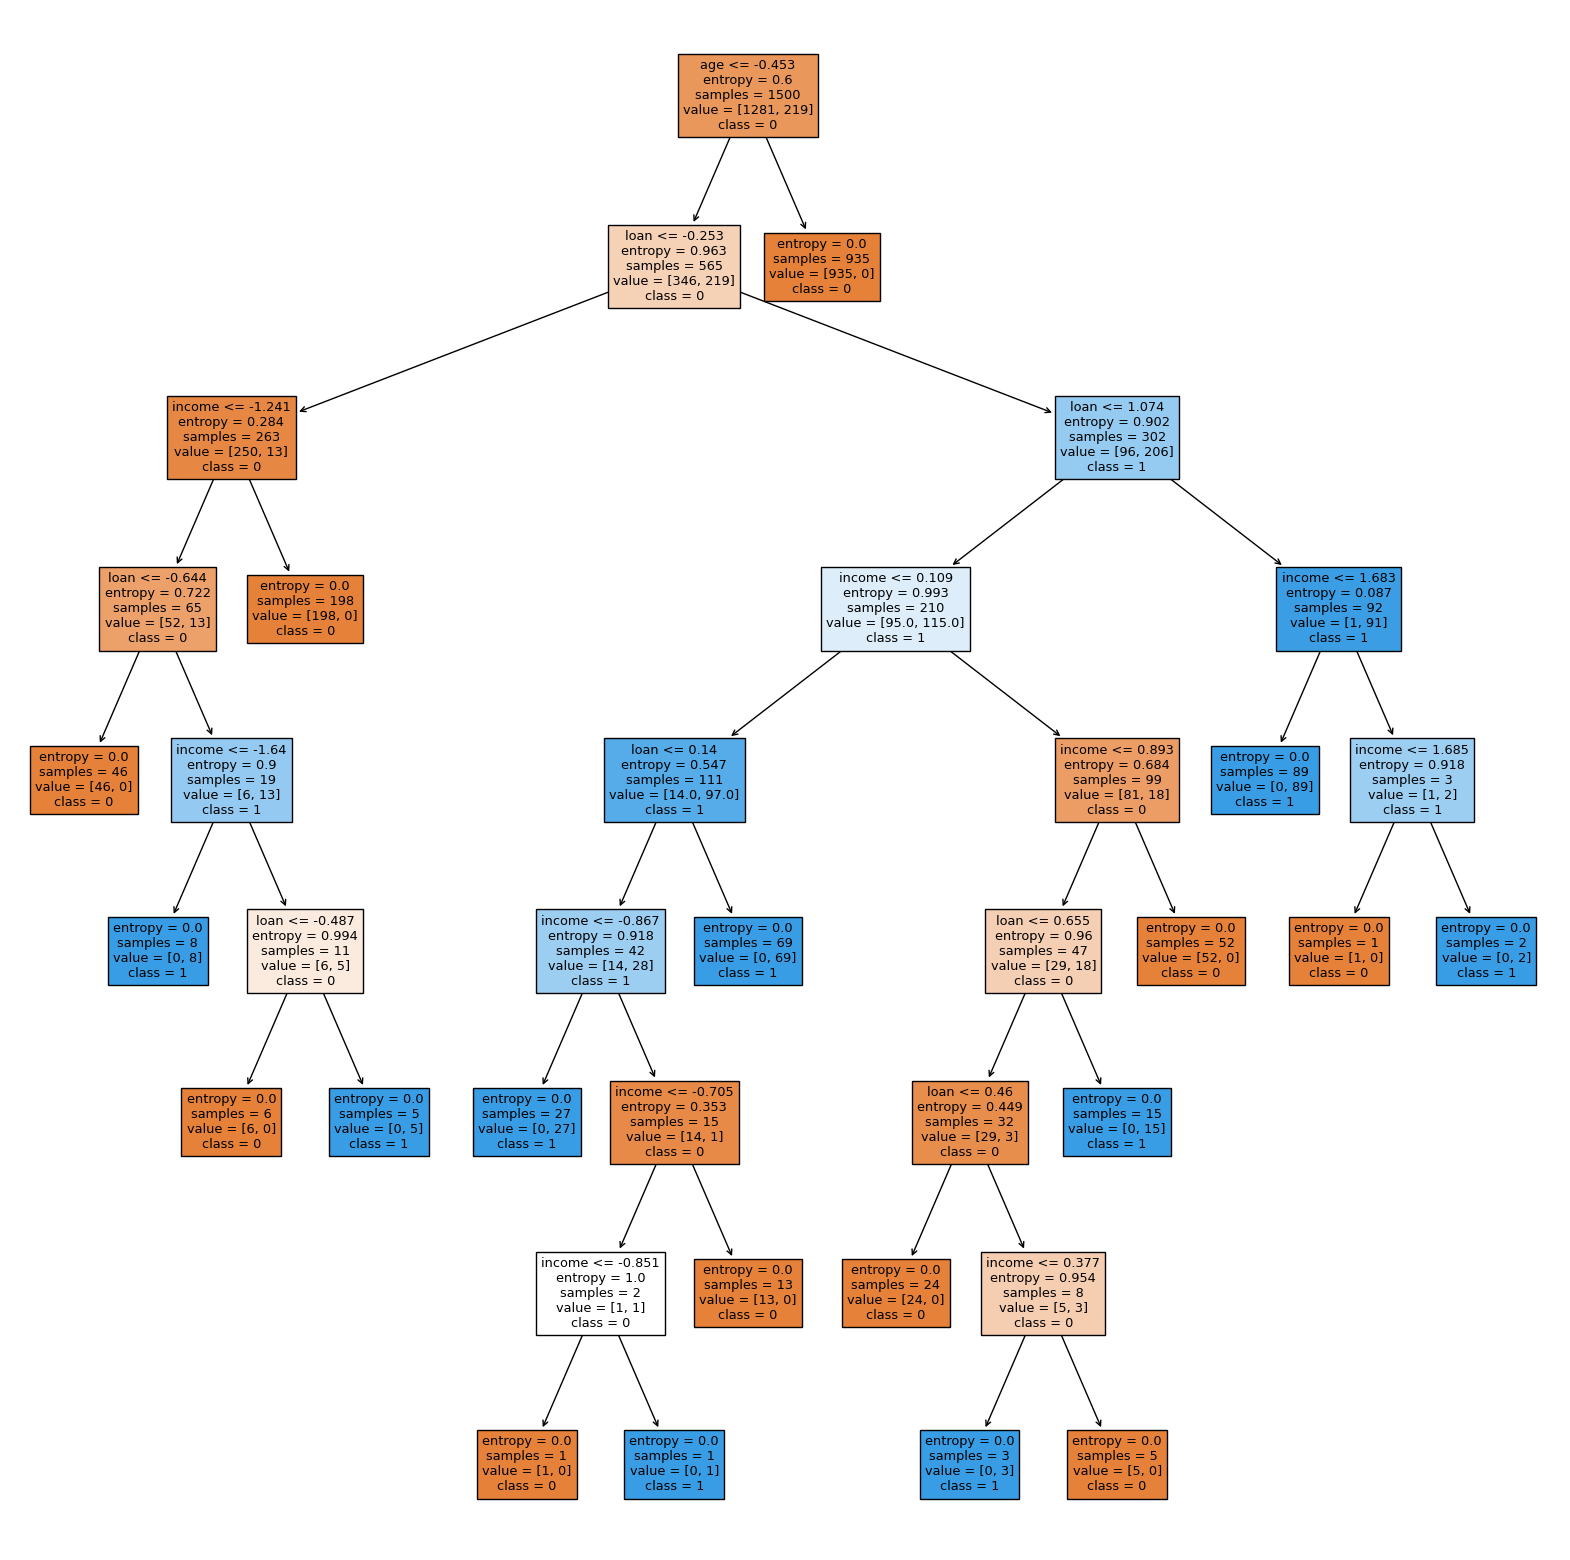

In [273]:
from sklearn import tree
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize= (20, 20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=['0', '1'], filled=True);
fig.savefig('arvore_credit.png')

### Base census

In [274]:
with open('census.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [275]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 78), (27676,))

In [276]:
x_census_teste.shape, y_census_teste.shape

((4885, 78), (4885,))

In [277]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(x_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [278]:
previsoes = arvore_census.predict(x_census_teste)
previsoes

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [279]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [280]:
accuracy_score(y_census_teste, previsoes) # melhor que antes

0.768474923234391

## Random Forest

In [281]:
from sklearn.ensemble import RandomForestClassifier

### Base credit data

In [282]:
import pickle

with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [283]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [284]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [285]:
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
random_forest_credit.fit(x_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [286]:
previsoes = random_forest_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [287]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [288]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes) 

0.984

In [289]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



### Base census

In [290]:
import pickle

with open('census.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [291]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 78), (27676,))

In [292]:
x_census_teste.shape, y_census_teste.shape

((4885, 78), (4885,))

In [293]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_census.fit(x_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [294]:
previsoes = random_forest_census.predict(x_census_teste)
previsoes

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [295]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [296]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8155578300921187

In [297]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.88      3693
        >50K       0.65      0.53      0.58      1192

    accuracy                           0.82      4885
   macro avg       0.75      0.72      0.73      4885
weighted avg       0.81      0.82      0.81      4885



## Regras

### Base risco credito

In [298]:
# o sklearn não possui algoritimo especifico para geração de regras
# pip install Orange3

# ASSISTIR SESSÃO 6

In [299]:
import Orange

In [300]:
base_risco_credito = Orange.data.Table("C:/Users/danil/OneDrive/Documentos/Machine Learning e Data Science com Python de A à Z-20240611T140920Z-001/Machine Learning e Data Science com Python de A à Z/Bases de dados/risco_credito_regras.csv")
base_risco_credito

[[ruim, alta, nenhuma, 0_15 | alto],
 [desconhecida, alta, nenhuma, 15_35 | alto],
 [desconhecida, baixa, nenhuma, 15_35 | moderado],
 [desconhecida, baixa, nenhuma, acima_35 | alto],
 [desconhecida, baixa, nenhuma, acima_35 | baixo],
 ...
]

In [301]:
base_risco_credito.domain

[historia, divida, garantias, renda | risco]

In [302]:
cn2 = Orange.classification.rules.CN2Learner()
regras_risco_credito = cn2(base_risco_credito)

In [303]:
for regras in regras_risco_credito.rule_list:
    print(regras)

IF renda==0_15 THEN risco=alto 
IF historia==boa AND divida!=alta THEN risco=baixo 
IF historia==boa AND garantias!=nenhuma THEN risco=baixo 
IF historia==boa AND renda!=15_35 THEN risco=baixo 
IF historia==boa THEN risco=moderado 
IF divida==alta THEN risco=alto 
IF historia!=desconhecida THEN risco=moderado 
IF garantias==adequada THEN risco=baixo 
IF renda==15_35 THEN risco=moderado 
IF historia==desconhecida THEN risco=alto 
IF TRUE THEN risco=alto 


In [304]:
# historia boa(0), divida alta(0), garantia nenhuma(1), renda > 35(2)
# historia ruim(2), divida alta(0), garantia adequada(0), renda < 15(0)

# não precisamos usar o label encoder pois o algoritimo sabe trabalhar com atributos categoricos

previsoes = regras_risco_credito([['boa', 'alta', 'nenhuma', 'acima_35'], ['ruim', 'alta', 'adequada', '0_15']])
previsoes

array([1, 0], dtype=int64)

In [305]:
base_risco_credito.domain.class_var.values

('alto', 'baixo', 'moderado')

In [306]:
for i in previsoes:
    # print(i)
    print(base_risco_credito.domain.class_var.values[i])

baixo
alto


### Base credito

In [307]:
base_credit = Orange.data.Table("C:/Users/danil/OneDrive/Documentos/Machine Learning e Data Science com Python de A à Z-20240611T140920Z-001/Machine Learning e Data Science com Python de A à Z/Bases de dados/credit_data_regras.csv")

In [308]:
base_credit.domain

[income, age, loan | default]

In [309]:
# import Orange.evaluation
base_dividida = Orange.evaluation.testing.sample(base_credit, n=0.25)

In [310]:
base_dividida[0]

[[48263, 28.5496, 7798.79 | 1],
 [42381, 35.7168, 6832.68 | 0],
 [65137.9, 42.1331, 10352.2 | 0],
 [48192.2, 29.7553, 5026.47 | 0],
 [55479, 53.7629, 6227.54 | 0],
 ...
]

In [311]:
base_dividida[1]

[[65705, 50.9284, 1969.79 | 0],
 [38337.8, 55.507, 5691.09 | 0],
 [41602.4, 25.2599, 7005.08 | 1],
 [40966.7, 46.7551, 2393.52 | 0],
 [48752.4, 30.7634, 8934.79 | 1],
 ...
]

In [312]:
base_treinamento = base_dividida[1]
base_teste = base_dividida[0]

In [313]:
len(base_treinamento), len(base_teste)

(1500, 500)

In [314]:
import Orange.classification


cn2 = Orange.classification.rules.CN2Learner()
regras_credit = cn2(base_treinamento)

In [315]:
for regras in regras_credit.rule_list:
    print(regras)

IF age>=34.9015168333426 THEN default=0 
IF age>=34.7514377613552 THEN default=1 
IF loan<=2495.13299137587 AND income>=20145.9885970689 THEN default=0 
IF loan>=7498.630446855849 AND loan>=9601.375482171099 THEN default=1 
IF loan>=7498.630446855849 AND loan>=9595.28628892989 THEN default=0 
IF loan>=7498.630446855849 AND age>=20.9909665295854 THEN default=1 
IF income>=57596.3540980592 AND age>=20.3008601283655 THEN default=0 
IF loan>=5659.509277874139 AND loan>=7181.4785525792595 THEN default=1 
IF loan>=5659.509277874139 AND loan>=7172.65433235279 THEN default=0 
IF income<=37277.1230572835 AND loan>=4360.05300945404 THEN default=1 
IF loan>=6043.14310633161 AND age>=27.2101574214175 THEN default=1 
IF age<=18.4162362311035 AND income>=32197.6207010448 THEN default=0 
IF age>=34.5792021681555 THEN default=0 
IF income<=29724.4768752716 AND loan>=3133.6244473393394 THEN default=1 
IF income<=22089.8374845274 AND age>=21.3656869572587 THEN default=1 
IF income>=46696.8926647678 AND 

In [316]:
# import Orange.evaluation


previsoes = Orange.evaluation.testing.TestOnTestData(base_treinamento, base_teste, [lambda testdata: regras_credit])

In [317]:
previsoes

In [318]:
'''
importando o Orange.evaluation tive um resultado bom, mas é melhor se eu não importar... porem o
import Orange.classification me deu um resultado melhor
'''

Orange.evaluation.CA(previsoes) 

array([0.976])

## Classificador base - Majority learner


### Base credit data

In [319]:
base_credit = Orange.data.Table("C:/Users/danil/OneDrive/Documentos/Machine Learning e Data Science com Python de A à Z-20240611T140920Z-001/Machine Learning e Data Science com Python de A à Z/Bases de dados/credit_data_regras.csv")

In [320]:
base_credit.domain

[income, age, loan | default]

In [321]:
majority = Orange.classification.MajorityLearner()

In [322]:
# import Orange.evaluation


previsoes = Orange.evaluation.TestOnTestData(base_credit, base_credit, [majority])

In [323]:
Orange.evaluation.CA(previsoes)

array([0.8585])

In [324]:
for registro in base_credit:
    print(registro.get_class())

0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
1
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0


In [325]:
from collections import Counter
Counter(str(registro.get_class()) for registro in base_credit)

Counter({'0': 1717, '1': 283})

In [326]:
1717 / 2000

0.8585

### Base census

In [327]:
base_census = Orange.data.Table("C:/Users/danil/OneDrive/Documentos/Machine Learning e Data Science com Python de A à Z-20240611T140920Z-001/Machine Learning e Data Science com Python de A à Z/Bases de dados/census_regras.csv")

In [328]:
base_census.domain

[age, workclass, final-weight, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loos, hour-per-week, native-country | income]

In [329]:
majority = Orange.classification.MajorityLearner()
previsoes = Orange.evaluation.testing.TestOnTestData(base_census, base_census, [majority])
Orange.evaluation.CA(previsoes)

array([0.75919044])

In [330]:
Counter(str(registro.get_class()) for registro in base_census)

Counter({'<=50K': 24720, '>50K': 7841})

## kNN

In [331]:
from sklearn.neighbors import KNeighborsClassifier

In [332]:
'''
calcular a distancia

Distancia Euclidiana: DE(x, y) = raiz(somatorio(xi - yi)²)

ex:
x = 5, 7, 9       DE(x=5, y=5) = raiz(somatorio(5 - 5)²)   
y = 5, 5, 5       DE(x=5, y=5) = raiz(somatorio(0)²)
                  DE(x=5, y=5) = raiz(somatorio(0))   guardamos o valor para depois usarmos o somatorio
                                 
                  DE(x=7, y=5) = raiz(somatorio(7 - 5)²)
                  DE(x=7, y=5) = raiz(somatorio(2)²)
                  DE(x=7, y=5) = raiz(somatorio(4))   guardamos o valor para depois usarmos o somatorio

                  DE(x=9, y=5) = raiz(somatorio(9 - 5)²)
                  DE(x=9, y=5) = raiz(somatorio(4)²)
                  DE(x=9, y=5) = raiz(somatorio(16))  guardamos o valor para depois usarmos o somatorio

                                 agora faremos o somatorio
                            DE = raiz(somatorio(0 + 4 + 16))
                            DE = raiz(20)
                            "DE = 4,47"
'''

'\ncalcular a distancia\n\nDistancia Euclidiana: DE(x, y) = raiz(somatorio(xi - yi)²)\n\nex:\nx = 5, 7, 9       DE(x=5, y=5) = raiz(somatorio(5 - 5)²)   \ny = 5, 5, 5       DE(x=5, y=5) = raiz(somatorio(0)²)\n                  DE(x=5, y=5) = raiz(somatorio(0))   guardamos o valor para depois usarmos o somatorio\n                                 \n                  DE(x=7, y=5) = raiz(somatorio(7 - 5)²)\n                  DE(x=7, y=5) = raiz(somatorio(2)²)\n                  DE(x=7, y=5) = raiz(somatorio(4))   guardamos o valor para depois usarmos o somatorio\n\n                  DE(x=9, y=5) = raiz(somatorio(9 - 5)²)\n                  DE(x=9, y=5) = raiz(somatorio(4)²)\n                  DE(x=9, y=5) = raiz(somatorio(16))  guardamos o valor para depois usarmos o somatorio\n\n                                 agora faremos o somatorio\n                            DE = raiz(somatorio(0 + 4 + 16))\n                            DE = raiz(20)\n                            "DE = 4,47"\n'

### Base credit data

In [333]:
import pickle
with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [334]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [335]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [336]:
# "minkowski" é a métrica de distância que será utilizada para o cálculo da similaridade entre os registros
# o parâmetro "p" está presente somente na métrica "minkowski" e tem dois valores, 1 - é para a 
# distância manhattan e o 2 - é para distância euclidiana
knn_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_credit.fit(x_credit_treinamento, y_credit_treinamento)

KNeighborsClassifier()

In [337]:
previsoes = knn_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [338]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [339]:
from sklearn.metrics import accuracy_score
accuracy_score(y_credit_teste, previsoes) 

0.986

In [340]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



### Base census

In [341]:
import pickle
with open('census.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [342]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 78), (27676,))

In [343]:
x_census_teste.shape, y_census_teste.shape

((4885, 78), (4885,))

In [344]:
# não precisa passar a metrica=minkowski e o P=2, pq eles são padrão
knn_census = KNeighborsClassifier(n_neighbors=10)
knn_census.fit(x_census_treinamento, y_census_treinamento)

KNeighborsClassifier(n_neighbors=10)

In [345]:
previsoes = knn_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [346]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [347]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.812691914022518

In [348]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.83      0.94      0.88      3693
        >50K       0.70      0.41      0.51      1192

    accuracy                           0.81      4885
   macro avg       0.77      0.68      0.70      4885
weighted avg       0.80      0.81      0.79      4885



## Regressão logística

In [349]:
from sklearn.linear_model import LogisticRegression
import pickle

### Base risco de crédito

In [350]:
with open('risco_credito.pkl', 'rb') as f:
    x_risco_credito, y_risco_credito = pickle.load(f)

In [351]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [352]:
# temos que apagar o "moderado"
y_risco_credito # 2, 7, 11

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [353]:
                                                       # axix=0 indica que excluirá a liha
                                                       # axix=1 é a coluna 
x_risco_credito = np.delete(x_risco_credito, [2, 7, 11], axis=0)
y_risco_credito = np.delete(y_risco_credito, [2, 7, 11], axis=0)



In [354]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [355]:
y_risco_credito

array(['alto', 'alto', 'alto', 'baixo', 'baixo', 'alto', 'baixo', 'baixo',
       'alto', 'baixo', 'alto'], dtype=object)

In [356]:
logistc_risco_credito = LogisticRegression(random_state=1)
logistc_risco_credito.fit(x_risco_credito, y_risco_credito)

LogisticRegression(random_state=1)

In [357]:
# esse é o b0
logistc_risco_credito.intercept_

array([-0.80855152])

In [358]:
# os coeficientes:
# b1: historia do credito 
# b2: dívida 
# b3: garantias 
# b4: renda anual
logistc_risco_credito.coef_

array([[-0.76706797,  0.23921064, -0.47989768,  1.12196145]])

In [359]:
# historia boa(0), divida alta(0), garantia nenhuma(1), renda > 35(2)
# historia ruim(2), divida alta(0), garantia adequada(0), renda < 15(0)
previsoes1 = logistc_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
previsoes1

array(['baixo', 'alto'], dtype=object)

### Base credit data

In [360]:
with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [361]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [362]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [363]:
logistc_credit = LogisticRegression(random_state=1)
logistc_credit.fit(x_credit_treinamento, y_credit_treinamento)

LogisticRegression(random_state=1)

In [364]:
logistc_credit.intercept_

array([-6.03333114])

In [365]:
logistc_credit.coef_

array([[-2.55275554, -3.72391763,  3.94333319]])

In [366]:
previsoes = logistc_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [367]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [368]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes) 

0.946

In [369]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



### Base census

In [370]:
with open('census.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [371]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 78), (27676,))

In [372]:
x_census_teste.shape, y_census_teste.shape

((4885, 78), (4885,))

In [373]:
logistc_census = LogisticRegression(random_state=1)
logistc_census.fit(x_census_treinamento, y_census_treinamento)

LogisticRegression(random_state=1)

In [374]:
previsoes = logistc_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [375]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [376]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8147389969293757

In [377]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.83      0.95      0.89      3693
        >50K       0.71      0.40      0.51      1192

    accuracy                           0.81      4885
   macro avg       0.77      0.67      0.70      4885
weighted avg       0.80      0.81      0.79      4885



## SVM

In [378]:
from sklearn.svm import SVC
import pickle

### Base credit

In [379]:
with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [380]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [381]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [382]:
# tipos de kernel: linear, poly, rbf, sigmoid
svm_credit = SVC(kernel='rbf', random_state=1, C=2.0)
svm_credit.fit(x_credit_treinamento, y_credit_treinamento)

SVC(C=2.0, random_state=1)

In [383]:
previsoes = svm_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [384]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [385]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_credit_teste, previsoes)) 

0.988


In [386]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.97      0.94      0.95        64

    accuracy                           0.99       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



### Base census

In [387]:
with open('census.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [388]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 78), (27676,))

In [389]:
x_census_teste.shape, y_census_teste.shape

((4885, 78), (4885,))

In [390]:
svm_census = SVC(kernel='rbf', random_state=1, C=4.0)
svm_census.fit(x_census_treinamento, y_census_treinamento)

SVC(C=4.0, random_state=1)

In [391]:
previsoes = svm_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [392]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [393]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8128966223132037

In [394]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.81      0.98      0.89      3693
        >50K       0.80      0.31      0.45      1192

    accuracy                           0.81      4885
   macro avg       0.81      0.64      0.67      4885
weighted avg       0.81      0.81      0.78      4885



# REDES NEURAIS ARTIFICIAIS

In [395]:
from sklearn.neural_network import MLPClassifier

In [396]:
'''
neurônio: processa as inforações
axônio: transmite sinal de um neurônio para outro (sinapses)

entrada -- neuronios e axonios -- saída

--------------------------------------------------------------
entradas: x1, x2, x3... xn
pesos: w1, w2, w3... wn
função soma: soma
função ativação: se for maior que 1 ele ativa

soma = xi * wi -- soma = x1 * w1 + x2 * w2 + x3 * w3 + xn * wn

--------------------------------------------------------------


ex:
    entradas: 1, 7, 5
    pesos: 0.8, 0.1, 0

    soma = (1 * 0.8) + (7 * 0.1) + (5 * 0)
    soma = 1.5

    função ativação: 1.5 > 1, ativado

----------------------------------------------    

ex:
    entradas: -1, 7, 5
    pesos: 0.8, 0.1, 0

    soma = (-1 * 0.8) + (7 * 0.1) + (5 * 0)
    soma = -0.1

    função ativação: step(função degrau): -0.1 < 1, não ativado

---------------------------------------------------------------   


step function:

primeira função(básica): ela ativa ou não (1 ou 0)!
                    __________
                    |
                    |
                    |
            ________|

__________________________________________________________

sigmoid function:

y = 1 / (1 + e^-x)

não é somente "0 ou 1"
se x for alto então o valor é proximo a 1
se x for baixo então o valor é proximo a 0
não tem valores negativos

__________________________________________________________

function hyperbolic tangent:

y = (e^x - e^-x)/(e^x + e^-x)

valores entre -1 e 1
                    
---------------------------------------------------------------

Erro: "erro" é um calculo feito para saber quanto erro a rede neural está gerando
com os erros correspondentes

ex:
    algoritimo mais simples
    
    erro = respostaCorreta - respostaErrada

ex2:
    formula para atualizar os pesos(os pesos são atualizados até os erros serem pequenos)

    peso(n + 1) = peso(n) + (taxaAprendizagem * entrada * erro)


---------------------------------------------------------------

y: função de ativação (sigmoid)
derivada = y * (y - 1) "serve para saber a direção que devemos ir"
delta saída = erro * derivada
delta oculto = derivada * peso(segundo) * delta saída
momento: escapar de mínimos locais (nem sempre funciona)
backpropagation: peso(n + 1) = peso(n) * momento + (entrada * delta * taxaAprendizagem)
bias: add uma nova entrada em cada camada(com pesos)
camadas ocultas: neuronio = (entradas + saidas)/2

f = classe(resultado esperado)
Mean Square Error(MSE): 1/N somatorio((f - calculado)^2 (somar depois com todas as entradas (como se somasse o "erro")))

ex:
    clase: 0, 1, 1, 0
    calculado: 0.406, 0.432, 0.437, 0.458

    ((0 - 0.406)^2) + ((0 - 0.432)^2) + ((0 - 0.437)^2) + ((0 - 0.458)^2) = 1.011

    N = 4
    1/N * 1.011
    1.011/N
    1.011/4 = 0.252
    

Root Mean Square Error(RMSE): faz o mesmo lá do de cima, porém temos que aplicar a raíz quadrada no resultado final

ex:
    1.011/4 = 0.252
    raiz(0.252) = 0.501
---------------------------------------------------------------

1. inicializa pesos aleatorios
2. calcula saídas  <-----+
3. calcula o erro        |
4. calcula pesos         |
5. atualiza novos pesos  |
6. erro é pequeno?       |
    6.1: não! -----------+
    6.2: sim! -----------> fim
'''



'\nneurônio: processa as inforações\naxônio: transmite sinal de um neurônio para outro (sinapses)\n\nentrada -- neuronios e axonios -- saída\n\n--------------------------------------------------------------\nentradas: x1, x2, x3... xn\npesos: w1, w2, w3... wn\nfunção soma: soma\nfunção ativação: se for maior que 1 ele ativa\n\nsoma = xi * wi -- soma = x1 * w1 + x2 * w2 + x3 * w3 + xn * wn\n\n--------------------------------------------------------------\n\n\nex:\n    entradas: 1, 7, 5\n    pesos: 0.8, 0.1, 0\n\n    soma = (1 * 0.8) + (7 * 0.1) + (5 * 0)\n    soma = 1.5\n\n    função ativação: 1.5 > 1, ativado\n\n----------------------------------------------    \n\nex:\n    entradas: -1, 7, 5\n    pesos: 0.8, 0.1, 0\n\n    soma = (-1 * 0.8) + (7 * 0.1) + (5 * 0)\n    soma = -0.1\n\n    função ativação: step(função degrau): -0.1 < 1, não ativado\n\n---------------------------------------------------------------   \n\n\nstep function:\n\nprimeira função(básica): ela ativa ou não (1 ou 0)

## Base credit data

In [397]:
import pickle

with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [398]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [399]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [400]:
# (N° de colunas + 1) / 2
(3 + 1)/2

2.0

In [401]:
rede_neural_credit = MLPClassifier(max_iter=1000, verbose=True, tol=0.0000100, hidden_layer_sizes=(2, 2))
rede_neural_credit.fit(x_credit_treinamento, y_credit_treinamento)

Iteration 1, loss = 1.01116059
Iteration 2, loss = 1.00251517
Iteration 3, loss = 0.99417239
Iteration 4, loss = 0.98576685
Iteration 5, loss = 0.97736365
Iteration 6, loss = 0.96915172
Iteration 7, loss = 0.96097459
Iteration 8, loss = 0.95271201
Iteration 9, loss = 0.94435535
Iteration 10, loss = 0.93590160
Iteration 11, loss = 0.92727896
Iteration 12, loss = 0.91881104
Iteration 13, loss = 0.91015289
Iteration 14, loss = 0.90116688
Iteration 15, loss = 0.89218760
Iteration 16, loss = 0.88349066
Iteration 17, loss = 0.87447454
Iteration 18, loss = 0.86537599
Iteration 19, loss = 0.85639983
Iteration 20, loss = 0.84720151
Iteration 21, loss = 0.83786781
Iteration 22, loss = 0.82860062
Iteration 23, loss = 0.81918046
Iteration 24, loss = 0.80980730
Iteration 25, loss = 0.80033341
Iteration 26, loss = 0.79082921
Iteration 27, loss = 0.78122222
Iteration 28, loss = 0.77147266
Iteration 29, loss = 0.76168760
Iteration 30, loss = 0.75187488
Iteration 31, loss = 0.74158390
Iteration 32, los

c:\Users\danil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



MLPClassifier(hidden_layer_sizes=(2, 2), max_iter=1000, tol=1e-05, verbose=True)

In [402]:
previsoes = rede_neural_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [403]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [404]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes) 

0.946

In [405]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



## Base census

In [406]:
with open('census.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [407]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 78), (27676,))

In [408]:
x_census_teste.shape, y_census_teste.shape

((4885, 78), (4885,))

In [409]:
(78 + 1)/2

39.5

In [410]:
rede_neural_census = MLPClassifier(max_iter=1000, verbose=True, tol=0.000000100, hidden_layer_sizes=(40, 25, 15))
rede_neural_census.fit(x_census_treinamento, y_census_treinamento)

Iteration 1, loss = 0.46598552
Iteration 2, loss = 0.40409421
Iteration 3, loss = 0.39512745
Iteration 4, loss = 0.39106637
Iteration 5, loss = 0.38913344
Iteration 6, loss = 0.38697299
Iteration 7, loss = 0.38499460
Iteration 8, loss = 0.38516387
Iteration 9, loss = 0.38319375
Iteration 10, loss = 0.38251498
Iteration 11, loss = 0.38116854
Iteration 12, loss = 0.38067277
Iteration 13, loss = 0.38073680
Iteration 14, loss = 0.38016319
Iteration 15, loss = 0.37934096
Iteration 16, loss = 0.37867488
Iteration 17, loss = 0.37859494
Iteration 18, loss = 0.37730615
Iteration 19, loss = 0.37675856
Iteration 20, loss = 0.37730628
Iteration 21, loss = 0.37763851
Iteration 22, loss = 0.37708310
Iteration 23, loss = 0.37572627
Iteration 24, loss = 0.37565397
Iteration 25, loss = 0.37503989
Iteration 26, loss = 0.37471719
Iteration 27, loss = 0.37489640
Iteration 28, loss = 0.37364918
Iteration 29, loss = 0.37317788
Iteration 30, loss = 0.37318171
Iteration 31, loss = 0.37250216
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(40, 25, 15), max_iter=1000, tol=1e-07,
              verbose=True)

In [411]:
previsoes = rede_neural_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [412]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [413]:
accuracy_score(y_census_teste, previsoes)

0.8239508700102354

# Avaliação de algoritimos

In [414]:
'''

. Naïve Bayes: 93.80%
. Árvore de decisão: 98.20%
. Random forest: 98.40%
. Regras: 97.80%
. Knn: 98.60%
. Regressão logística: 94.60%
. SVM: 98.80%
. Redes neurais: 100%, 99.80%, 99.60%, 99.40%, 94% (os pesos mudam) 

'''

'\n\n. Naïve Bayes: 93.80%\n. Árvore de decisão: 98.20%\n. Random forest: 98.40%\n. Regras: 97.80%\n. Knn: 98.60%\n. Regressão logística: 94.60%\n. SVM: 98.80%\n. Redes neurais: 100%, 99.80%, 99.60%, 99.40%, 94% (os pesos mudam) \n\n'

## Tuning dos parâmetros com GridSearch

### preparação dos dados

In [415]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [416]:
import pickle
with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [417]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [418]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [419]:
# axis=0 serve para apontar para as linhas (para que as colunas não se juntem tbm)
x_credit = np.concatenate((x_credit_treinamento, x_credit_teste), axis=0)
x_credit.shape

(2000, 3)

In [420]:
x_credit

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 1.37445674, -1.05746281, -1.12564819],
       [-1.57087737, -0.63488173, -0.36981671],
       [-1.03572293, -0.93978122,  0.04244312]])

In [421]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis=0)
y_credit.shape

(2000,)

In [422]:
y_credit

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

## Árvore de decisão

In [423]:
# coloco alguns parametros para que o algoritimo teste e veja qual o melhor
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [424]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


## Random forest

In [425]:
# usamos quase os mesmos parametros da arvore
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [426]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
0.9865


## knn

In [427]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [428]:
# nem sempre usando o grid search vamos ter melhores resultados
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


## Regressão logística

In [429]:
parametros = {'tol': [0.0001, 0.00001, 0.000001], 
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [430]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


## SVM

In [431]:
parametros = {'tol': [0.001, 0.0001, 0.00001], 
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [432]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


## Rede neural

In [433]:
parametros = {'activation': ['relu', 'logistic', 'tahn'], 
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [434]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_


c:\Users\danil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\danil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\danil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\danil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\dan

In [435]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'relu', 'batch_size': 56, 'solver': 'adam'}
0.9964999999999999


## Validação cruzada

In [436]:
from sklearn.model_selection import cross_val_score, KFold

In [437]:
#  vamos fazer 300 testes por algoritimo
# 10 * 30 = 300

In [438]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
    # shuffle=True serve para que o algoritimo misturar os dados;     
    # random_state=i pq vai ter resultados diferentes
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

# ---------------------------------------------------------------------------
    # arvore

    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1,
                                     min_samples_split=5, splitter='best')
    score = cross_val_score(arvore, x_credit, y_credit, cv=kfold)
    resultados_arvore.append(score.mean())
    

# ---------------------------------------------------------------------------
    # random forest

    random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1,
                                     min_samples_split=5, n_estimators=10)
    score = cross_val_score(random_forest, x_credit, y_credit, cv=kfold)
    resultados_random_forest.append(score.mean())


# ---------------------------------------------------------------------------
    # knn

    knn = KNeighborsClassifier()
    score = cross_val_score(knn, x_credit, y_credit, cv=kfold)
    resultados_knn.append(score.mean())


# ---------------------------------------------------------------------------
    # logistica

    logistica = LogisticRegression(C=1.0, solver='lbfgs', tol=0.0001)
    score = cross_val_score(logistica, x_credit, y_credit, cv=kfold)
    resultados_logistica.append(score.mean())


# ---------------------------------------------------------------------------
    # svm

    svm = SVC(kernel='rbf', C=2.0)
    score = cross_val_score(svm, x_credit, y_credit, cv=kfold)
    resultados_svm.append(score.mean())


# ---------------------------------------------------------------------------
    # rede neural

    rede_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')
    score = cross_val_score(rede_neural, x_credit, y_credit, cv=kfold)
    resultados_rede_neural.append(score.mean())





c:\Users\danil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\danil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\danil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\danil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\dan

In [439]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm, 'Rede neural': resultados_rede_neural})
resultados

Arvore  Random forest     KNN  Logistica     SVM  Rede neural
0   0.9865         0.9845  0.9815     0.9475  0.9845       0.9975
1   0.9850         0.9825  0.9800     0.9465  0.9840       0.9980
2   0.9905         0.9850  0.9795     0.9470  0.9865       0.9970
3   0.9875         0.9830  0.9780     0.9460  0.9850       0.9975
4   0.9880         0.9835  0.9820     0.9465  0.9850       0.9965
5   0.9885         0.9865  0.9780     0.9465  0.9845       0.9975
6   0.9880         0.9820  0.9805     0.9470  0.9860       0.9970
7   0.9875         0.9825  0.9800     0.9480  0.9850       0.9970
8   0.9865         0.9835  0.9795     0.9465  0.9840       0.9965
9   0.9875         0.9815  0.9820     0.9465  0.9845       0.9970
10  0.9860         0.9825  0.9795     0.9475  0.9840       0.9970
11  0.9900         0.9840  0.9825     0.9480  0.9845       0.9980
12  0.9890         0.9860  0.9825     0.9475  0.9855       0.9975
13  0.9870         0.9835  0.9780     0.9485  0.9855       0.9975
14  0.9835         0.9850  0.9810     0.9485  0.9830       0.9960
15  0.9860         0.9825  0.9790     0.9475  0.9865       0.9980
16  0.9855         0.9820  0.9810     0.9460  0.9860       0.9975
17  0.9905         0.9855  0.9800     0.9470  0.9865       0.9970
18  0.9875         0.9820  0.9805     0.9465  0.9850       0.9980
19  0.9870         0.9865  0.9795     0.9465  0.9845       0.9970
20  0.9830         0.9820  0.9820     0.9465  0.9840       0.9970
21  0.9865         0.9830  0.9825     0.9470  0.9850       0.9980
22  0.9890         0.9830  0.9780     0.9455  0.9865       0.9970
23  0.9875         0.9815  0.9810     0.9465  0.9875       0.9970
24  0.9880         0.9860  0.9795     0.9475  0.9870       0.9975
25  0.9880         0.9840  0.9790     0.9470  0.9820       0.9970
26  0.9880         0.9850  0.9770     0.9475  0.9840       0.9975
27  0.9860         0.9800  0.9785     0.9465  0.9865       0.9965
28  0.9865         0.9815  0.9790     0.9480  0.9835       0.9965
29  0.9885         0.9850  0.9805     0.9465  0.9865       0.9975

In [440]:
resultados.describe() # std é o desvio padrão (quanto maior a média e menor o desvio padrão MELHOR)

Arvore  Random forest        KNN  Logistica        SVM  Rede neural
count  30.000000      30.000000  30.000000  30.000000  30.000000    30.000000
mean    0.987283       0.983500   0.980050   0.947000   0.985083     0.997217
std     0.001745       0.001692   0.001533   0.000743   0.001280     0.000520
min     0.983000       0.980000   0.977000   0.945500   0.982000     0.996000
25%     0.986500       0.982125   0.979000   0.946500   0.984125     0.997000
50%     0.987500       0.983250   0.980000   0.947000   0.985000     0.997000
75%     0.988000       0.985000   0.981000   0.947500   0.986375     0.997500
max     0.990500       0.986500   0.982500   0.948500   0.987500     0.998000

In [441]:
resultados.var() # variancia

Arvore           3.046264e-06
Random forest    2.862069e-06
KNN              2.350862e-06
Logistica        5.517241e-07
SVM              1.639368e-06
Rede neural      2.704023e-07
dtype: float64

In [442]:
(resultados.std() / resultados.mean()) * 100

Arvore           0.176784
Random forest    0.172015
KNN              0.156446
Logistica        0.078435
SVM              0.129977
Rede neural      0.052145
dtype: float64

## Teste de normalidade dos resultados

In [443]:
alpha = 0.05

In [444]:
from scipy.stats import shapiro

In [445]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural) 

(ShapiroResult(statistic=0.9627084817746213, pvalue=0.3626014221368128),
 ShapiroResult(statistic=0.9583919981570738, pvalue=0.28163760813959665),
 ShapiroResult(statistic=0.9584024823930501, pvalue=0.2818135378764127),
 ShapiroResult(statistic=0.9309147727892649, pvalue=0.051930740130906254),
 ShapiroResult(statistic=0.9622985607506823, pvalue=0.3541579284945434),
 ShapiroResult(statistic=0.9098238352865964, pvalue=0.014728957474234028))

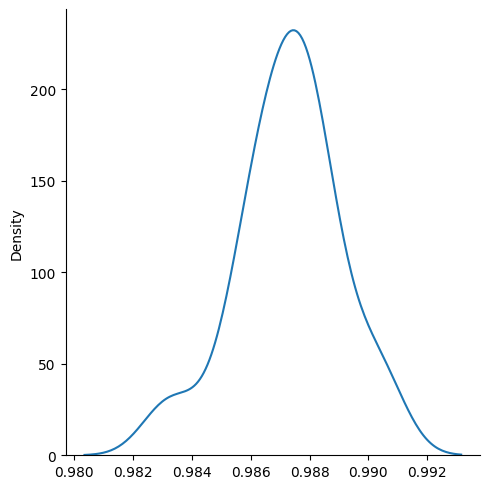

In [447]:
sns.displot(resultados_arvore, kind='kde');

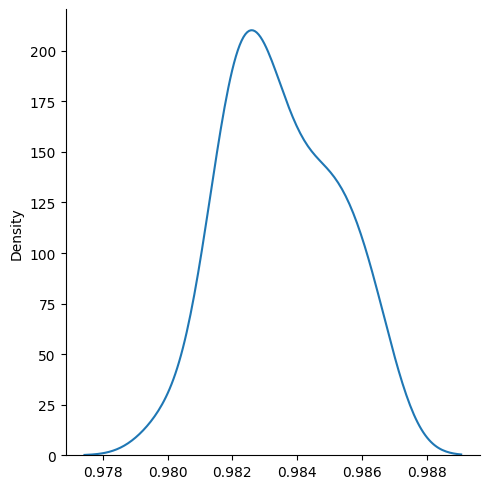

In [448]:
sns.displot(resultados_random_forest, kind='kde');

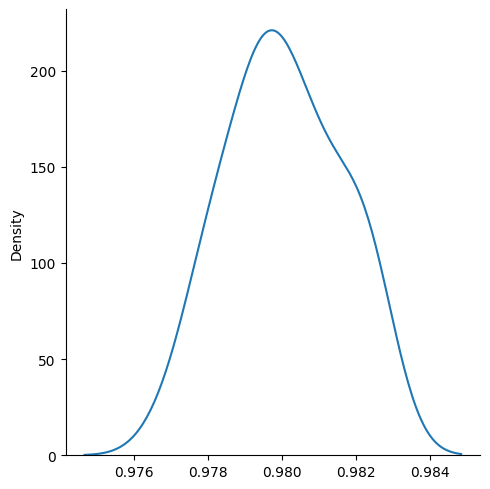

In [449]:
sns.displot(resultados_knn, kind='kde');

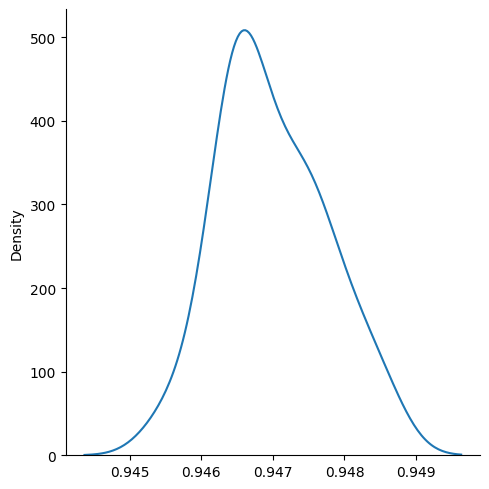

In [450]:
sns.displot(resultados_logistica, kind='kde');

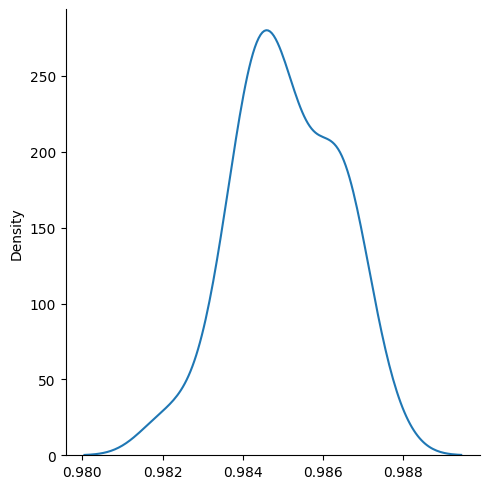

In [451]:
sns.displot(resultados_svm, kind='kde');

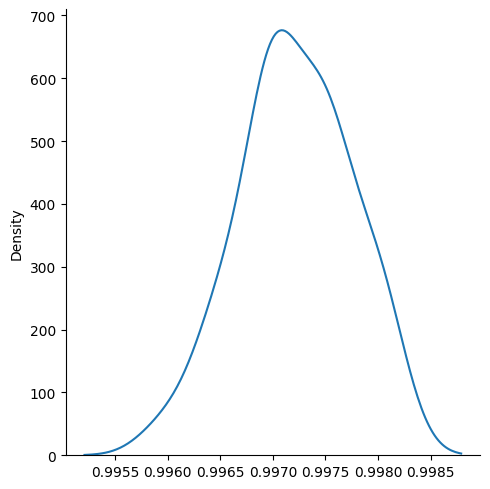

In [454]:
sns.displot(resultados_rede_neural, kind='kde');

In [456]:
from scipy.stats import f_oneway

In [459]:
_,p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural)
p

1.412600684400928e-185

In [460]:
# tanto faz o algoritimo(arvore, rede neural, etc...)se os resultados fossem iguais

alpha = 0.05
if p <= alpha:
    print('Hipótese nula rejeitada. Dados são diferentes')
else:
    print('Hipótese alternativa rejeitada. Dados iguais')

Hipótese nula rejeitada


In [462]:
resultados_algoritimos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest,
                                                      resultados_knn, resultados_logistica,
                                                      resultados_svm, resultados_rede_neural]),
                                                      'algoritimo': ['arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                                                                     'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest',
                                                                     'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn',
                                                                     'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica',
                                                                     'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm',
                                                                     'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural']}

In [467]:
resultados_df = pd.DataFrame(resultados_algoritimos)
resultados_df

accuracy   algoritimo
0      0.9865       arvore
1      0.9850       arvore
2      0.9905       arvore
3      0.9875       arvore
4      0.9880       arvore
..        ...          ...
175    0.9970  rede_neural
176    0.9975  rede_neural
177    0.9965  rede_neural
178    0.9965  rede_neural
179    0.9975  rede_neural

[180 rows x 2 columns]

In [470]:
from statsmodels.stats.multicomp import MultiComparison

In [471]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritimo'])

In [472]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0072    0.0 -0.0082 -0.0062   True
       arvore     logistica  -0.0403    0.0 -0.0413 -0.0393   True
       arvore random_forest  -0.0038    0.0 -0.0048 -0.0028   True
       arvore   rede_neural   0.0099    0.0  0.0089  0.0109   True
       arvore           svm  -0.0022    0.0 -0.0032 -0.0012   True
          knn     logistica   -0.033    0.0  -0.034 -0.0321   True
          knn random_forest   0.0035    0.0  0.0025  0.0044   True
          knn   rede_neural   0.0172    0.0  0.0162  0.0182   True
          knn           svm    0.005    0.0   0.004   0.006   True
    logistica random_forest   0.0365    0.0  0.0355  0.0375   True
    logistica   rede_neural   0.0502    0.0  0.0492  0.0512   True
    logistica           svm   0.0381    0.0  0.0371  0.0391   

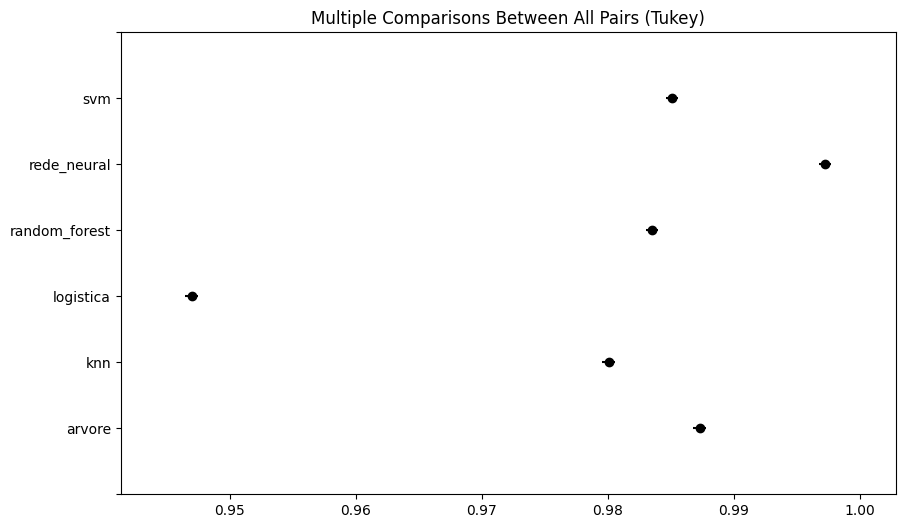

In [473]:
teste_estatistico.plot_simultaneous();

## Salvar classificador treinado

In [474]:
with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [475]:
x_credit = np.concatenate((x_credit_treinamento, x_credit_teste), axis=0)
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis=0)

In [476]:
x_credit.shape, y_credit.shape

((2000, 3), (2000,))

In [477]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [478]:
classificador_rede_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')
classificador_rede_neural.fit(x_credit, y_credit)

c:\Users\danil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(batch_size=56)

In [479]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
classificador_arvore.fit(x_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [517]:
classificador_svm = SVC(C=2.0, kernel='rbf', probability=True)
classificador_svm.fit(x_credit, y_credit)

SVC(C=2.0, probability=True)

In [518]:
import pickle
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav', 'wb'))
pickle.dump(classificador_arvore, open('arvore_finalizado.sav', 'wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav', 'wb'))

## Carregar um classificador já treinado

In [519]:
rede_neural = pickle.load(open('rede_neural_finalizado.sav', 'rb'))
arvore = pickle.load(open('arvore_finalizado.sav', 'rb'))
svm = pickle.load(open('svm_finalizado.sav', 'rb'))

In [492]:
novo_registro = x_credit[1999]
novo_registro

array([-1.03572293, -0.93978122,  0.04244312])

In [493]:
novo_registro.shape

(3,)

In [494]:
novo_registro = novo_registro.reshape(1, -1)
novo_registro.shape

(1, 3)

In [495]:
rede_neural.predict(novo_registro)

array([1], dtype=int64)

In [496]:
arvore.predict(novo_registro)

array([1], dtype=int64)

In [497]:
svm.predict(novo_registro)

array([1], dtype=int64)

## Combinação de classificadores

In [503]:
novo_registro = x_credit[1999]
novo_registro = novo_registro.reshape(1, -1)
novo_registro, novo_registro.shape

(array([[-1.03572293, -0.93978122,  0.04244312]]), (1, 3))

In [504]:
resposta_rede_neural = rede_neural.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)
resposta_svm = svm.predict(novo_registro)

In [505]:
resposta_rede_neural[0], resposta_arvore[0], resposta_svm[0]

(1, 1, 1)

In [506]:
paga = 0
nao_paga = 0

if resposta_rede_neural[0] == 1:
    nao_paga += 1
else:
    paga += 1


if resposta_arvore[0] == 1:
    nao_paga += 1
else:
    paga += 1


if resposta_svm[0] == 1:
    nao_paga += 1
else:
    paga += 1



if paga > nao_paga:
    print('Cliente pagará')
elif paga == nao_paga:
    print('empate')
else:
    print('cliente não pagara')

cliente não pagara


## Rejeição de classificadores

In [510]:
novo_registro = x_credit[0]
novo_registro = novo_registro.reshape(1, -1)
novo_registro, novo_registro.shape

(array([[-1.3754462 ,  0.50631087,  0.10980934]]), (1, 3))

In [511]:
resposta_rede_neural = rede_neural.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)
resposta_svm = svm.predict(novo_registro)

In [512]:
resposta_rede_neural[0], resposta_arvore[0], resposta_svm[0]

(0, 0, 0)

In [513]:
probabilidade_rede_neural = rede_neural.predict_proba(novo_registro)
probabilidade_rede_neural

array([[1.00000000e+00, 9.33538734e-18]])

In [514]:
confianca_rede_neural = probabilidade_rede_neural.max()
confianca_rede_neural

1.0

In [515]:
probabilidade_arvore = arvore.predict_proba(novo_registro)
confianca_arvore = probabilidade_arvore.max()
confianca_arvore

1.0

In [520]:
probabilidade_svm = svm.predict_proba(novo_registro)
confianca_svm = probabilidade_svm.max()
confianca_svm

0.9999989342575494

In [522]:
paga = 0
nao_paga = 0
confiaca_min = 0.999999
algoritmos = 0

if confianca_rede_neural >= confiaca_min:
    algoritmos += 1
    if resposta_rede_neural[0] == 1:
        nao_paga += 1
    else:
        paga += 1

if confianca_arvore >= confiaca_min:
    algoritmos += 1
    if resposta_arvore[0] == 1:
        nao_paga += 1
    else:
        paga += 1

if confianca_svm >= confiaca_min:
    algoritmos += 1
    if resposta_svm[0] == 1:
        nao_paga += 1
    else:
        paga += 1



if paga > nao_paga:
    print('Cliente pagará, baseado em {} algoritimos'.format(algoritmos))
elif paga == nao_paga:
    print('empate, baseado em {} algoritimos'.format(algoritmos))
else:
    print('cliente não pagara, baseado em {} algoritimos'.format(algoritmos))

Cliente pagará, baseado em 2 algoritimos


# Regressão linear